In [26]:
include("NNSFE.jl")

quartic_potential (generic function with 1 method)

In [22]:
psi0 = exp.(-x_grid.^2 + 1im .*x_grid);  # Initial wave function

psi = psi0 # Time evolution loop
alpha, g, s, V = 1.8, 1, 1, 1;  # Fractional order, nonlinearity, saturation, and potential

psi_evo = zeros(ComplexF64, N, M) # Initialize wave function evolution array
for t in 1:M
    psi = time_evolution(psi, alpha, dt, k, g, s, V)
    psi_evo[:, t] = psi
end

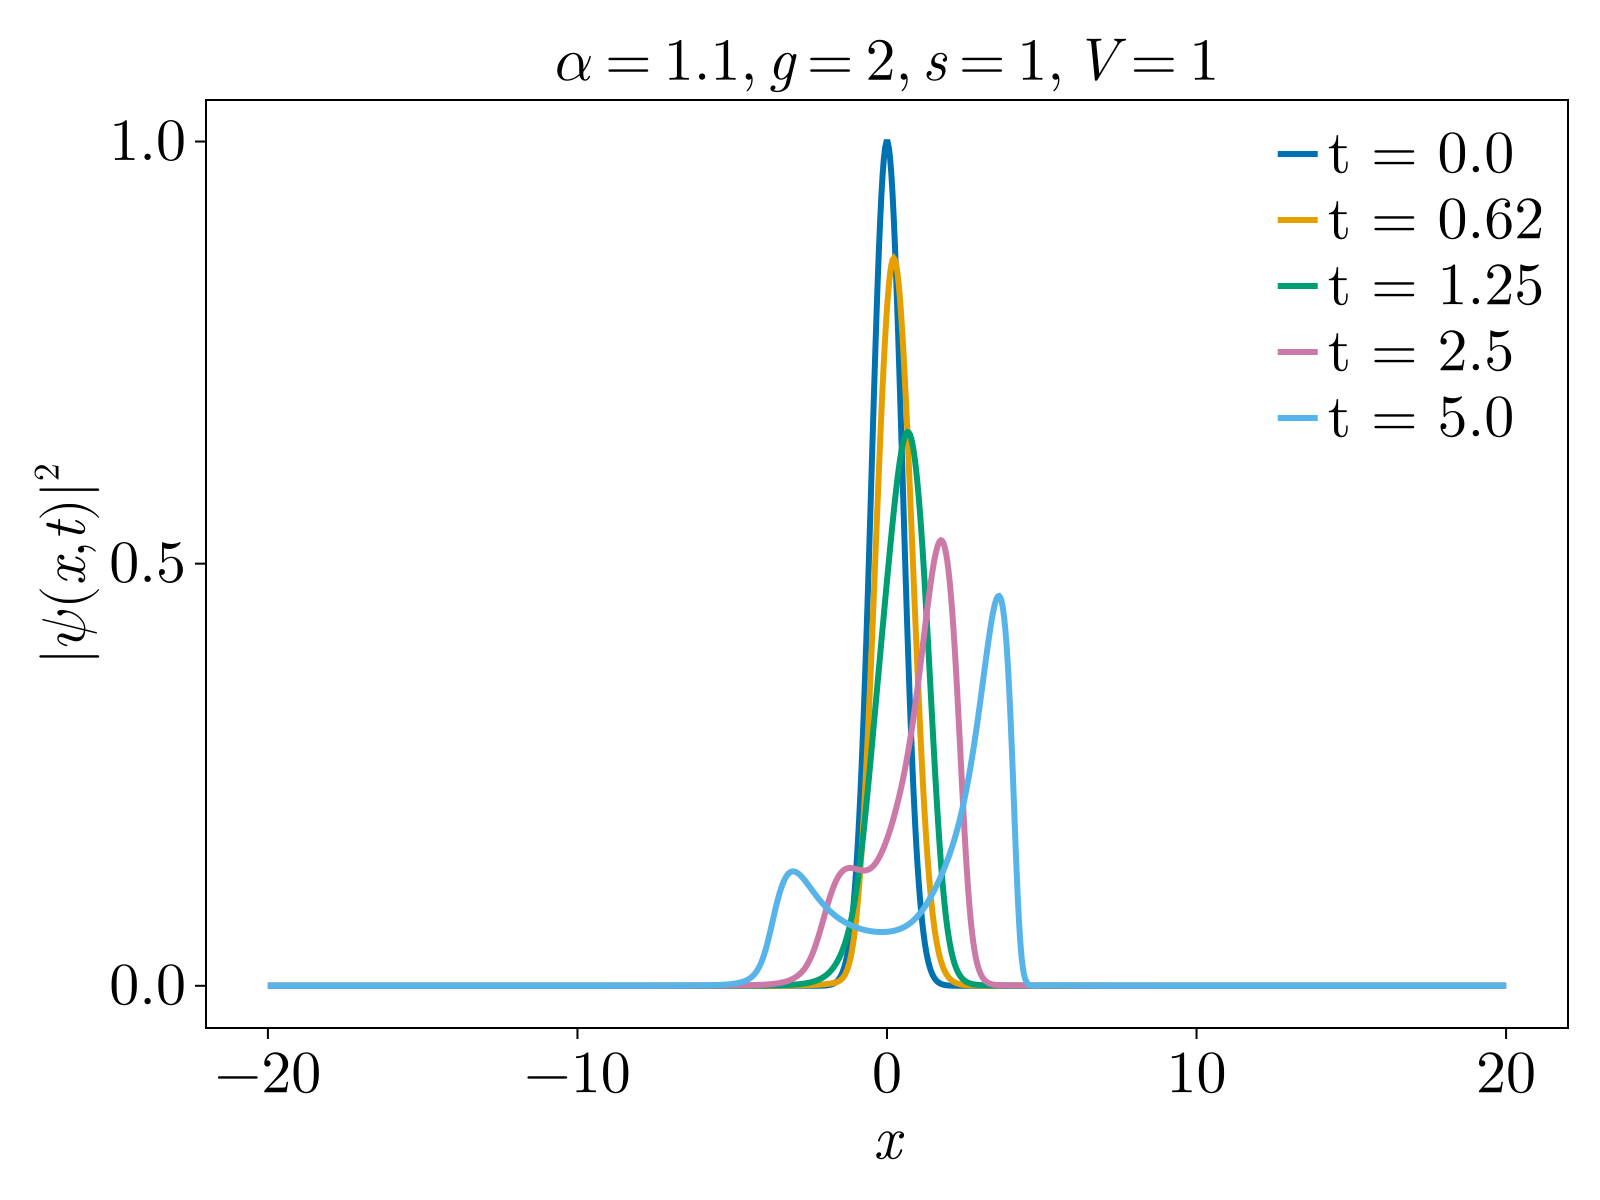

In [23]:
# Calculate |psi|^2
psi_final = real(psi_evo .* conj(psi_evo))

# Select time steps to plot
time_steps_to_plot = [1, Int(M//8), Int(M//4), Int(M//2), M]

# Plot results
# Set global theme
set_theme!(theme_latexfonts(), size = (800, 600))

fig = Figure(fontsize = 30)
ax = Axis(fig[1, 1], xlabel = L"x", ylabel = L"|\psi(x,t)|^2", xgridvisible = false, ygridvisible = false,
title = L"\alpha = 1.1,\, g = 2,\, s = 1,\, V = 1")
for t in time_steps_to_plot
    lines!(ax, x_grid, psi_final[:, t], label="t = $(round(tfinal * t / M, digits=2))", alpha=1, linewidth=3)
end

axislegend(ax, framevisible = false)
#save("./figs/fnlse_evolution_02.pdf", fig)
fig  # Display the plot

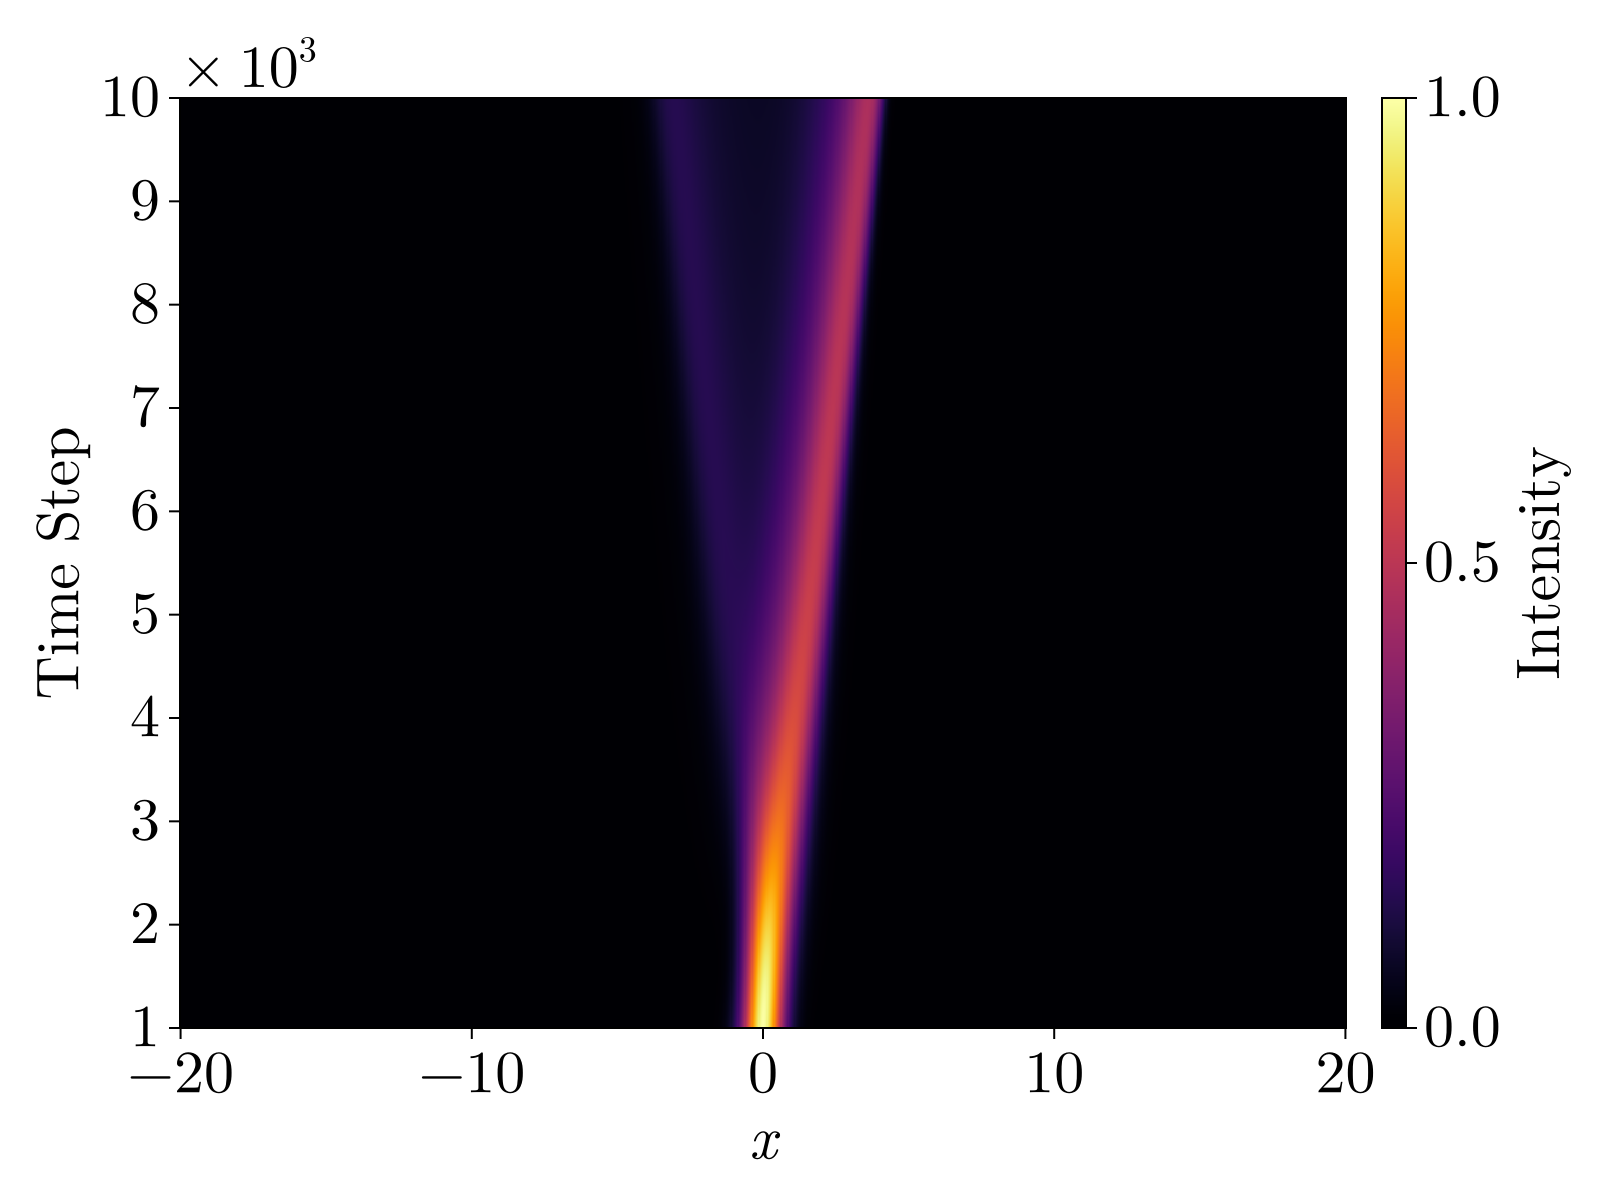

In [24]:
# Plot heatmap of the evolution of |psi|^2 over space and time
fig = Figure(fontsize=30)
ax = Axis(fig[1, 1], xlabel = L"$x$", ylabel = "Time Step")
y_scaled = 1:M/1000
heatmap!(ax, x_grid, y_scaled, psi_final, colormap = :inferno, rasterize = 1)
Label(fig[1, 1, Top()], halign = :left, L"\times 10^{3}")
# Add colorbar
Colorbar(fig[1, 2], colormap = :inferno, label = "Intensity")
#save("./figs/fnlse_heatmap_02.pdf", fig)
fig  # Display the heatmap plot

### Quartic Potential

In [38]:
psi0 = exp.(-x_grid.^2 + 1im .*x_grid);  # Initial wave function

V_har = harmonic_potential(x_grid) # Harmonic potential

psi = psi0 # Time evolution loop
alpha, g, s, V = 1.1, 1, 1, V_har;  # Fractional order, nonlinearity, saturation, and potential

psi_evo = zeros(ComplexF64, N, M) # Initialize wave function evolution array
for t in 1:M
    psi = time_evolution(psi, alpha, dt, k, g, s, V)
    psi_evo[:, t] = psi
end

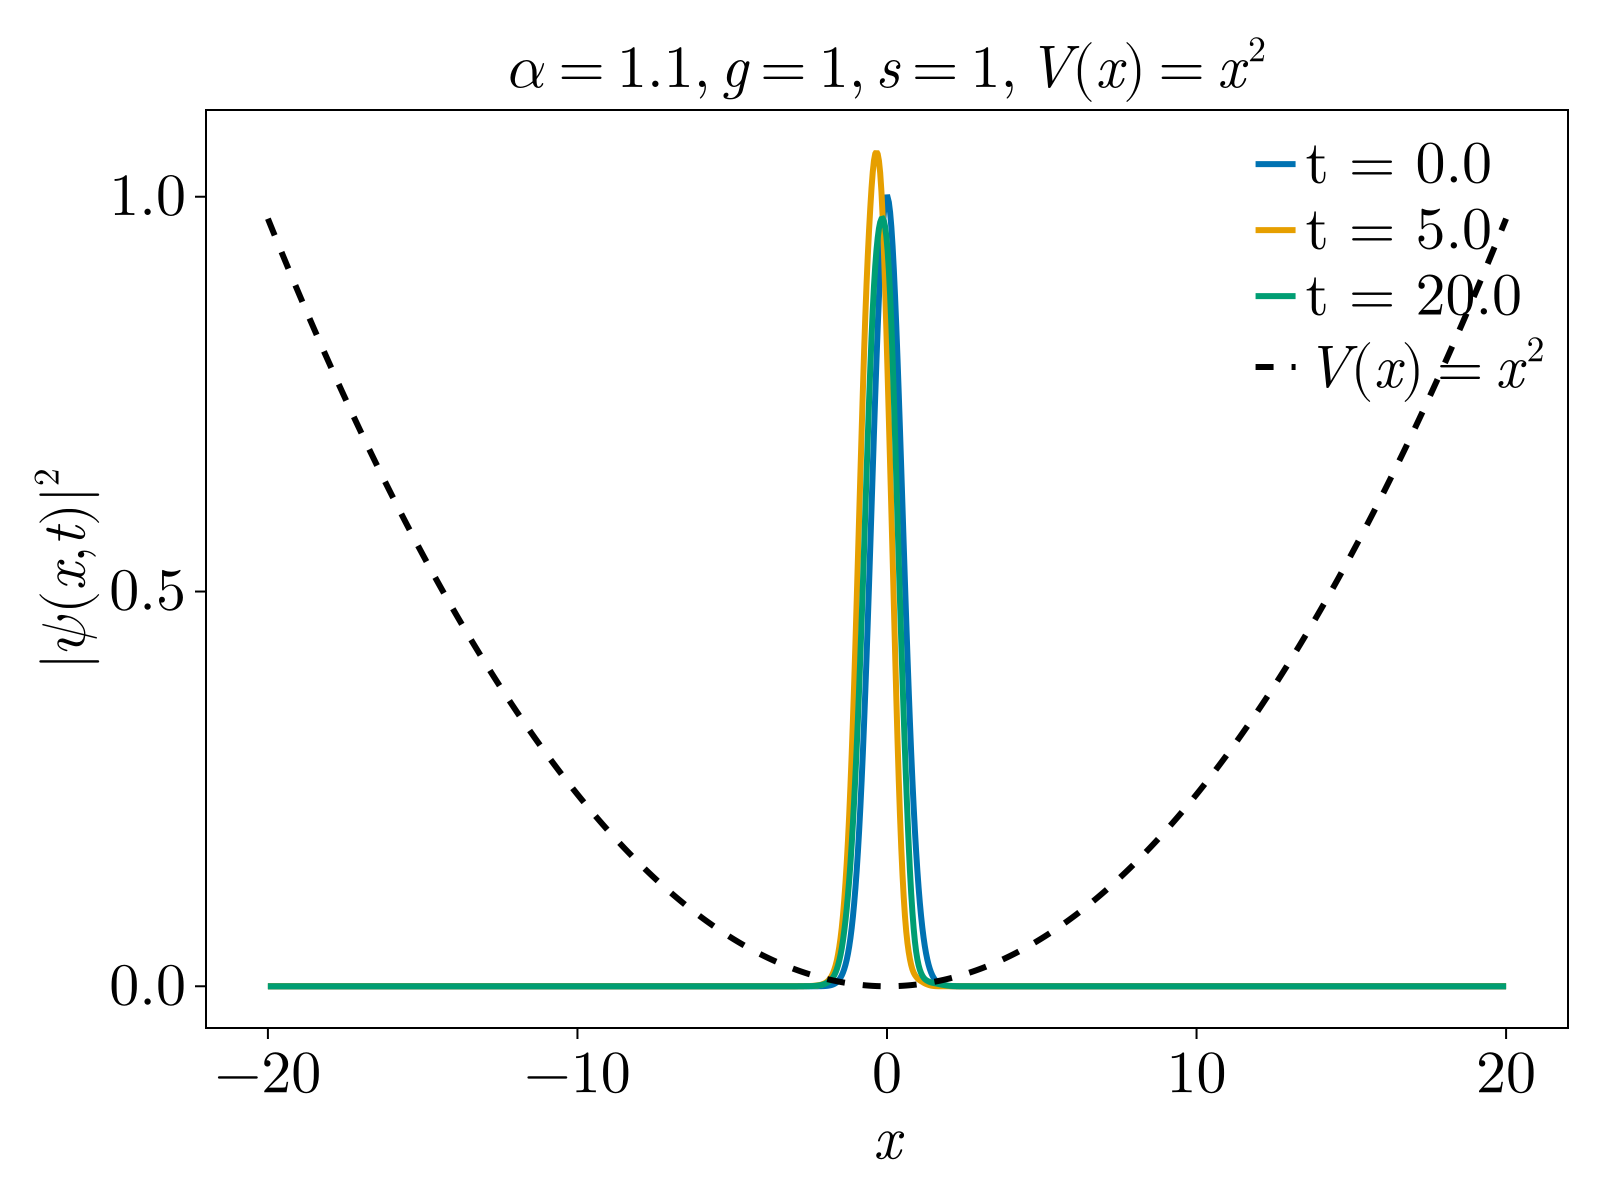

In [53]:
# Calculate |psi|^2
psi_final = real(psi_evo .* conj(psi_evo))

# Select time steps to plot
time_steps_to_plot = [1, Int(M//4), M]

# Plot results
# Set global theme
set_theme!(theme_latexfonts(), size = (800, 600))

fig = Figure(fontsize = 30)
ax = Axis(fig[1, 1], xlabel = L"x", ylabel = L"|\psi(x,t)|^2", xgridvisible = false, ygridvisible = false,
title = L"\alpha = 1.1,\, g = 1,\, s = 1,\, V(x) = x^2")
for t in time_steps_to_plot
    lines!(ax, x_grid, psi_final[:, t], label="t = $(round(tfinal * t / M, digits=2))", alpha=1, linewidth=3)
end
V_har = V_har * maximum(psi_final[:, M]) / maximum(V_har)
lines!(ax, x_grid, V_har, label=L"V(x) = x^2", color = :black, linestyle = :dash, linewidth = 3)

axislegend(ax, framevisible = false)
save("./figs/fnlse_evolution_har.pdf", fig)
fig  # Display the plot

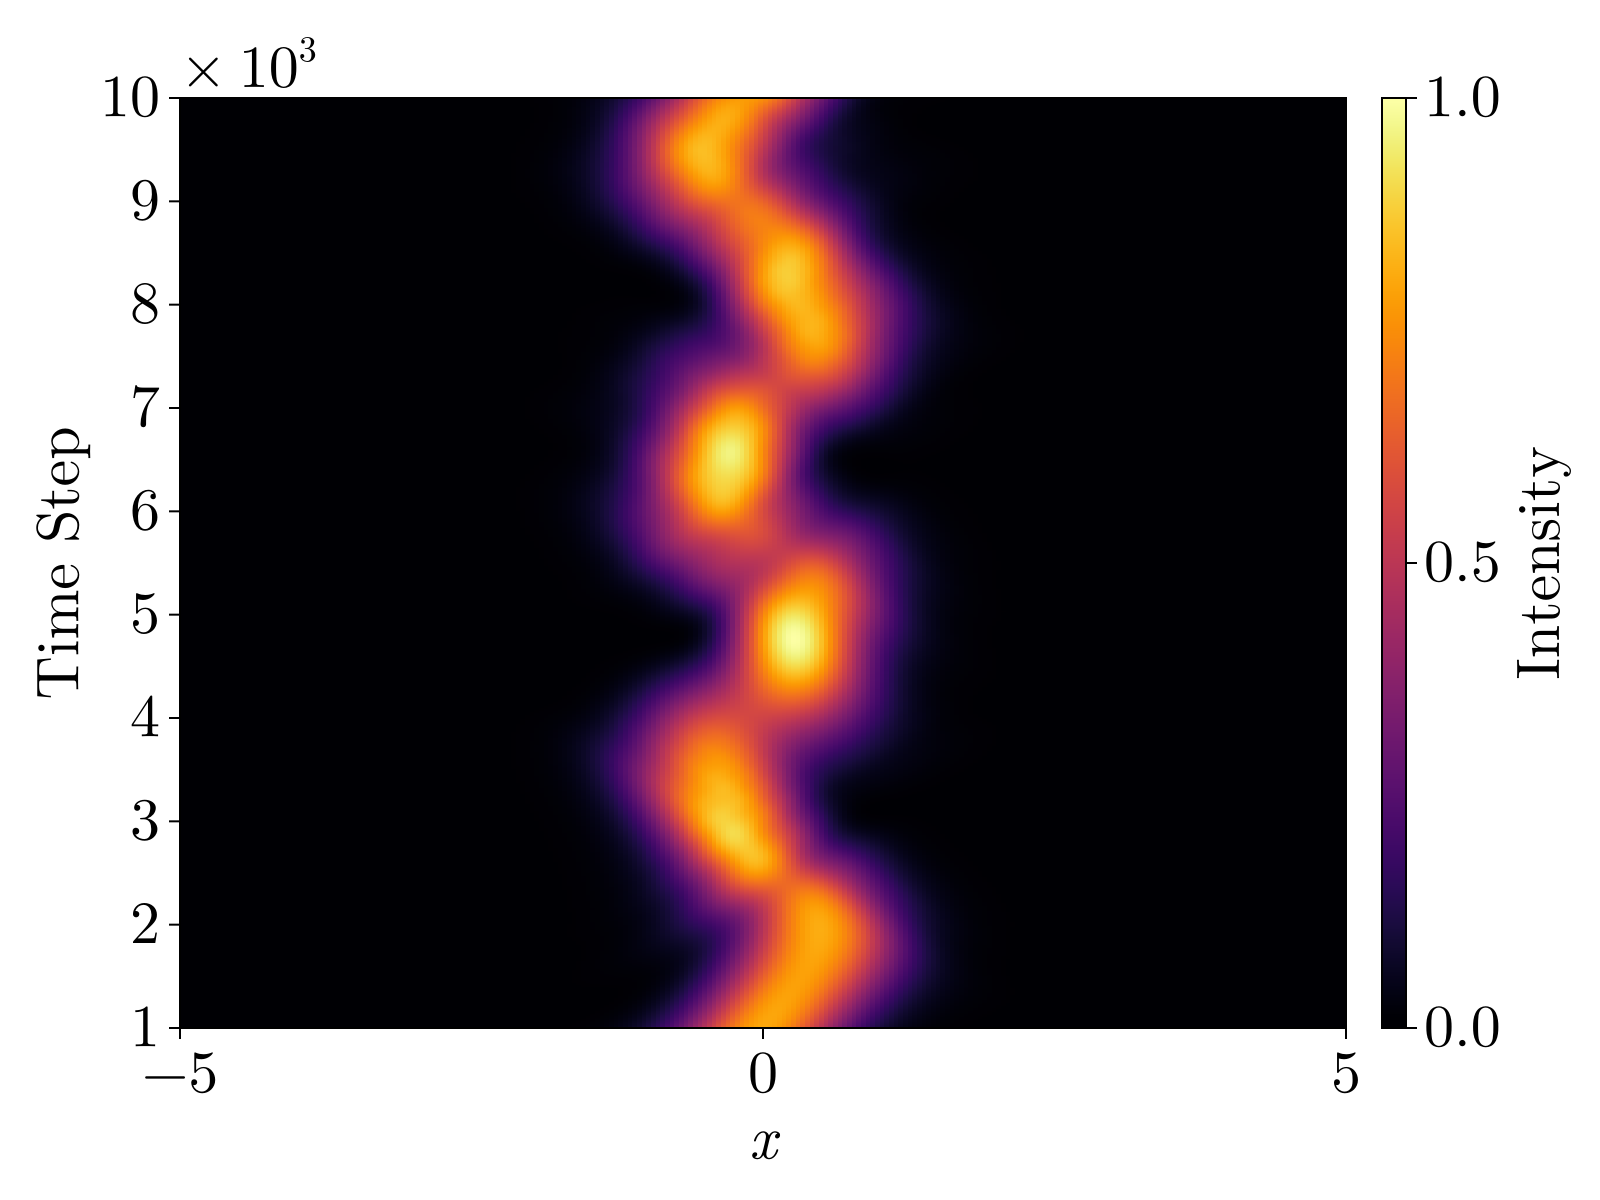

In [54]:
# Plot heatmap of the evolution of |psi|^2 over space and time
fig = Figure(fontsize=30)
ax = Axis(fig[1, 1], xlabel = L"$x$", ylabel = "Time Step")
y_scaled = 1:M/1000
heatmap!(ax, x_grid, y_scaled, psi_final, colormap = :inferno, rasterize = 1)
xlims!(ax, -5, 5)
Label(fig[1, 1, Top()], halign = :left, L"\times 10^{3}")
# Add colorbar
Colorbar(fig[1, 2], colormap = :inferno, label = "Intensity")
save("./figs/fnlse_heatmap_har.pdf", fig)
fig  # Display the heatmap plot

#### Quartic Potential

In [62]:
psi0 = exp.(-x_grid.^2 + 1im .*x_grid);  # Initial wave function

V_quar = quartic_potential(x_grid) # Quartic potential

psi = psi0 # Time evolution loop
alpha, g, s, V = 1.1, 2, 1.5, V_quar;  # Fractional order, nonlinearity, saturation, and potential

psi_evo = zeros(ComplexF64, N, M) # Initialize wave function evolution array
for t in 1:M
    psi = time_evolution(psi, alpha, dt, k, g, s, V)
    psi_evo[:, t] = psi
end

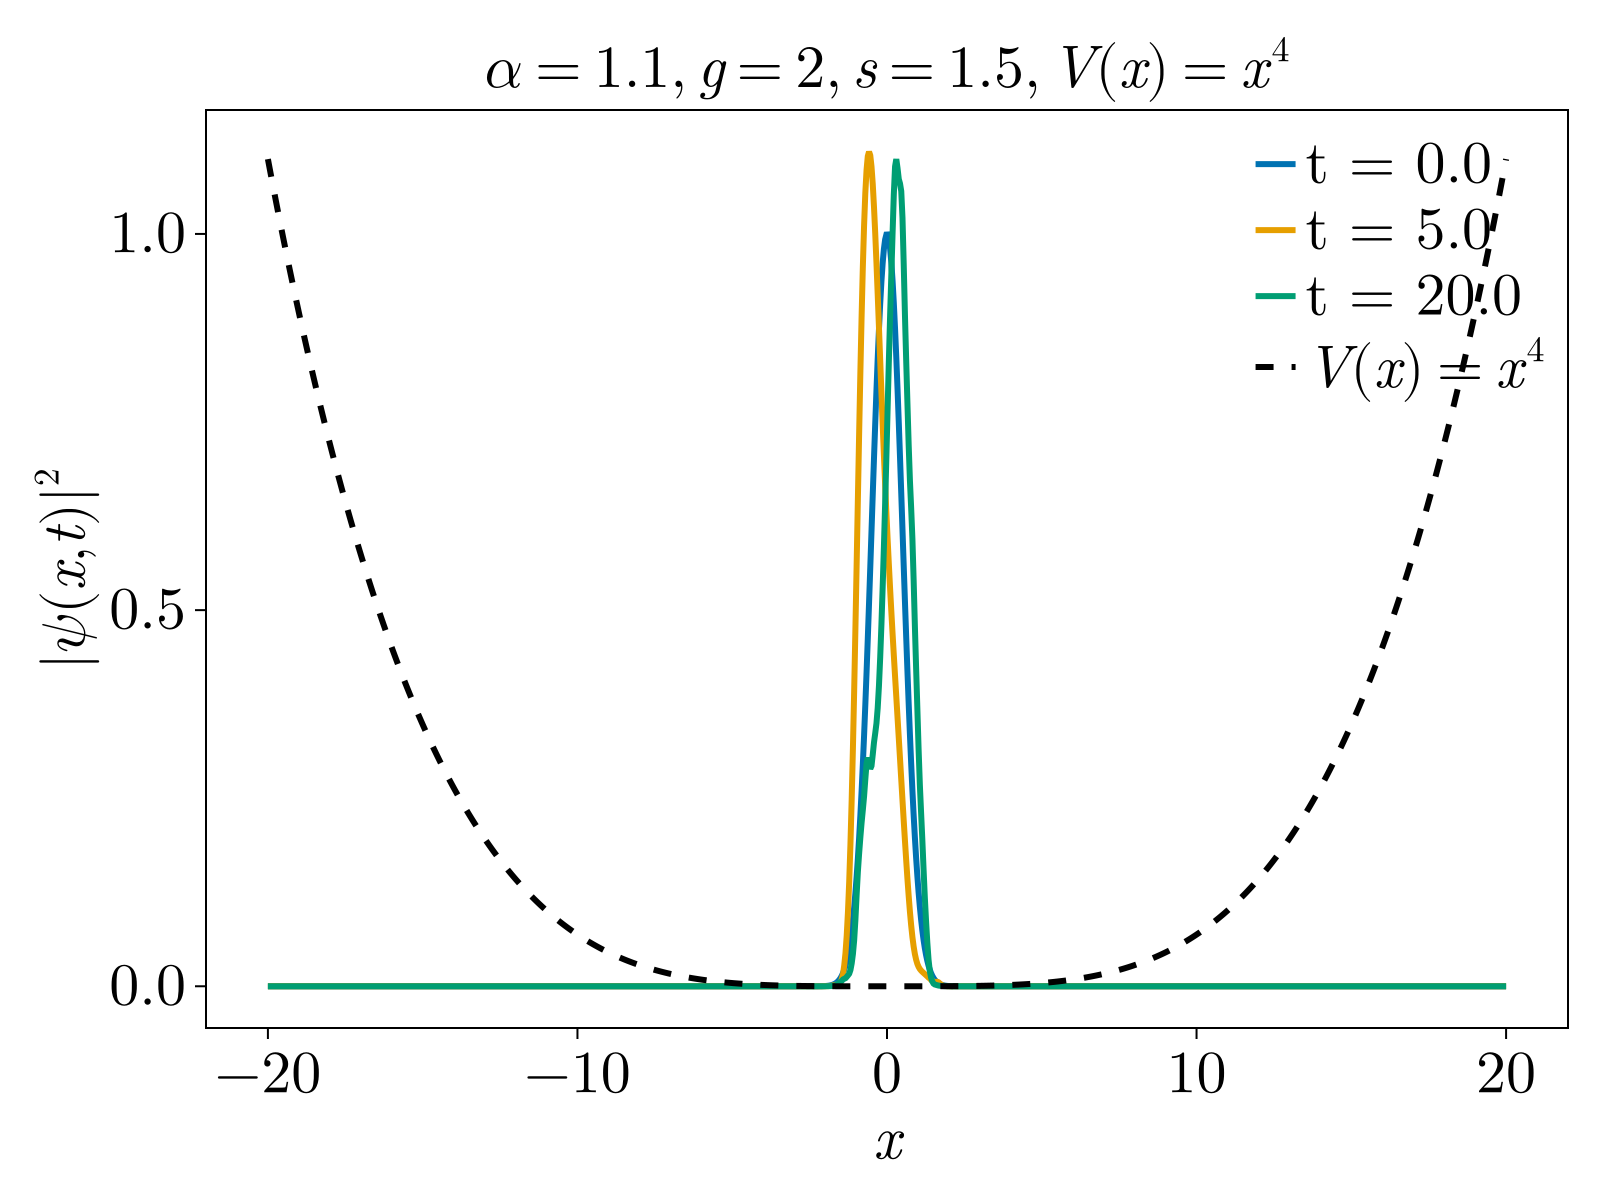

In [65]:
# Calculate |psi|^2
psi_final = real(psi_evo .* conj(psi_evo))

# Select time steps to plot
time_steps_to_plot = [1, Int(M//4), M]

# Plot results
# Set global theme
set_theme!(theme_latexfonts(), size = (800, 600))

fig = Figure(fontsize = 30)
ax = Axis(fig[1, 1], xlabel = L"x", ylabel = L"|\psi(x,t)|^2", xgridvisible = false, ygridvisible = false,
title = L"\alpha = 1.1,\, g = 2,\, s = 1.5,\, V(x) = x^4")
for t in time_steps_to_plot
    lines!(ax, x_grid, psi_final[:, t], label="t = $(round(tfinal * t / M, digits=2))", alpha=1, linewidth=3)
end
V_quar = V_quar * maximum(psi_final[:, M]) / maximum(V_quar)
lines!(ax, x_grid, V_quar, label=L"V(x) = x^4", color = :black, linestyle = :dash, linewidth = 3)

axislegend(ax, framevisible = false)
save("./figs/fnlse_evolution_quar.pdf", fig)
fig  # Display the plot

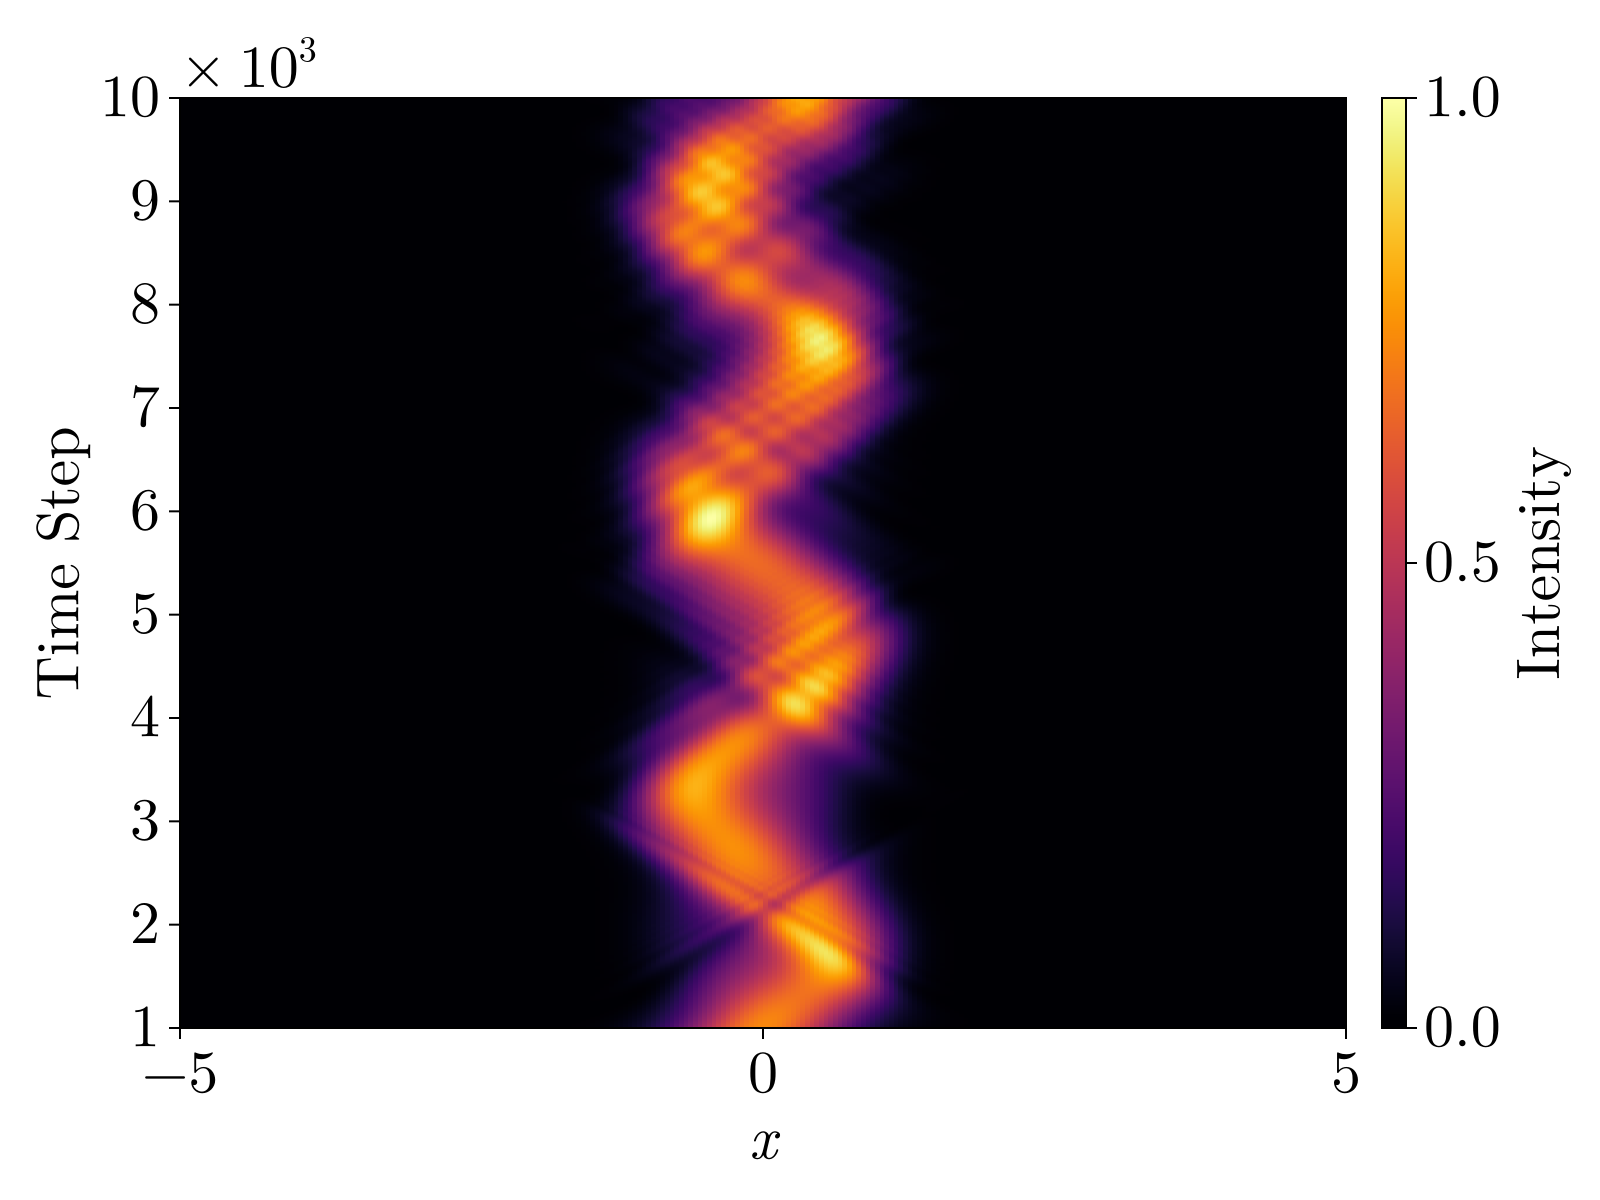

In [66]:
# Plot heatmap of the evolution of |psi|^2 over space and time
fig = Figure(fontsize=30)
ax = Axis(fig[1, 1], xlabel = L"$x$", ylabel = "Time Step")
y_scaled = 1:M/1000
heatmap!(ax, x_grid, y_scaled, psi_final, colormap = :inferno, rasterize = 1)
xlims!(ax, -5, 5)
Label(fig[1, 1, Top()], halign = :left, L"\times 10^{3}")
# Add colorbar
Colorbar(fig[1, 2], colormap = :inferno, label = "Intensity")
save("./figs/fnlse_heatmap_quar.pdf", fig)
fig  # Display the heatmap plot